# Statistics (correlation optimized thresholds and impairment level)

In [1]:
from functions.statistics import *
from utilities import *

In [2]:
initial_path = '../data/CreateStudy'
s_json_files = get_json_paths(initial_path, 'S')

In [3]:
result = extract_fields_from_json_files(s_json_files, ['optimal_GMAC_NDH', 'optimal_GMAC_DH', 'min_max_std_GMAC_NDH', 'min_max_std_GMAC_DH', 'optimal_GMAC_NDH_Linus', 'optimal_GMAC_DH_Linus', 'min_max_std_GMAC_NDH_Linus', 'min_max_std_GMAC_DH_Linus', 'ARAT_score', 'FMA-UE_score', 'participant_id', 'dominant_arm_affected'])

In [4]:
PATIENT_ID = result['participant_id']
ARAT = result['ARAT_score']
FMA_UE = result['FMA-UE_score']

optimal_thresholds = result['optimal_GMAC_NDH']
COUNT_THRESHOLD = optimal_thresholds[:,0]
PITCH_THRESHOLD = optimal_thresholds[:,1]
optimal_thresholds_Linus = result['optimal_GMAC_NDH_Linus']
COUNT_THRESHOLD_LINUS = optimal_thresholds_Linus[:,0]
PITCH_THRESHOLD_LINUS = optimal_thresholds_Linus[:,1]

min_max_std_optimal_thresholds_GMAC_NDH = result['min_max_std_GMAC_NDH']
STD_COUNT_NDH, STD_PITCH_NDH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_NDH)
min_max_std_optimal_thresholds_GMAC_NDH_Linus = result['min_max_std_GMAC_NDH_Linus']
STD_COUNT_NDH_LINUS, STD_PITCH_NDH_LINUS = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_NDH_Linus)

DOMINANT_IMPAIRED = result["dominant_arm_affected"]

## Impaired Arm

### Subash GMAC

In [5]:
print("Mean standard deviation of optimal counts thresholds NDH: ", np.mean(STD_COUNT_NDH))
print("Mean standard deviation of optimal elevation thresholds NDH: ", np.mean(STD_PITCH_NDH))

Mean standard deviation of optimal counts thresholds NDH:  0.5534604909737258
Mean standard deviation of optimal elevation thresholds NDH:  1.5487228133623714


Linear model coefficients: [-0.04263987]
Linear model intercept: 3.656762629005975
Pearson Correlation: -0.32879465788650597 p-value: 0.35360202905227084
Spearman Correlation: -0.5443450530086585 p-value: 0.10377582065702175


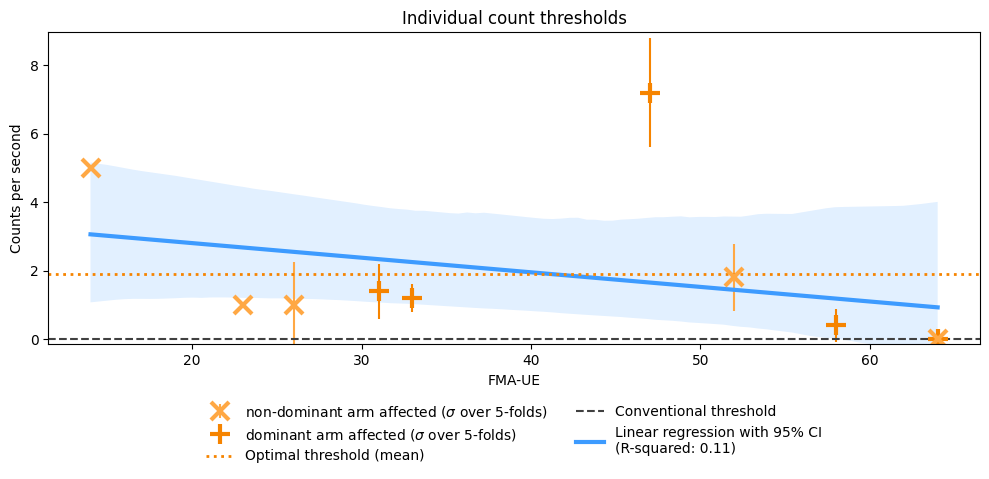

Polynomial model coefficients (degree 2): [ 0.         -3.09628521  0.03822865]
Polynomial model intercept (degree 2): 94.03548922434385
Pearson Correlation: 0.06777130974339089 p-value: 0.8524292892806553
Spearman Correlation: 0.1580554413568168 p-value: 0.6627622972444478


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


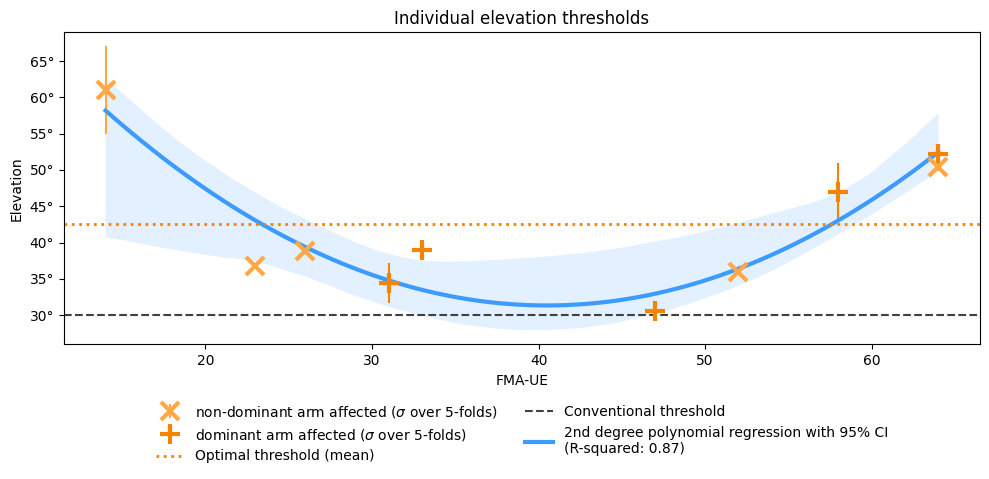

In [6]:
check_regression(FMA_UE, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='FMA-UE', y_label='Counts per second', title='Individual count thresholds', dominant_impared=DOMINANT_IMPAIRED, model_to_fit='linear')
check_regression(FMA_UE, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='FMA-UE', y_label='Elevation', title='Individual elevation thresholds', dominant_impared=DOMINANT_IMPAIRED, model_to_fit='polynomial')
#check_regression(ARAT, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='ARAT', y_label='Count Threshold', title='Individual count thresholds', dominant_impared=DOMINANT_IMPAIRED)
#check_regression(ARAT, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='ARAT', y_label='Pitch Threshold', title='Individual elevation thresholds', dominant_impared=DOMINANT_IMPAIRED)

### Linus GMAC

Linear model coefficients: [-0.04224606]
Linear model intercept: 3.6605377512221615
Pearson Correlation: -0.31889275059729 p-value: 0.3691370566824793
Spearman Correlation: -0.5443450530086585 p-value: 0.10377582065702175


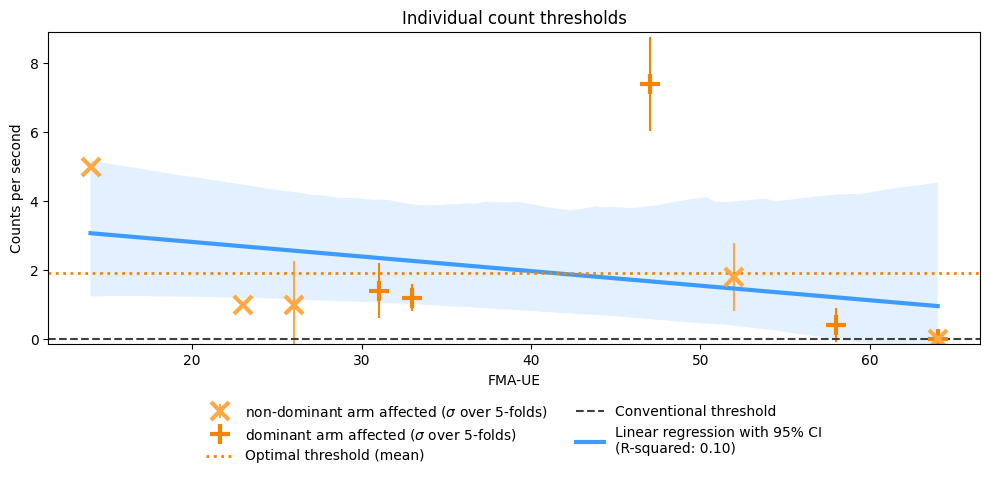

Polynomial model coefficients (degree 2): [ 0.         -2.9572982   0.03577835]
Polynomial model intercept (degree 2): 92.27022057446948
Pearson Correlation: -0.0506382100669674 p-value: 0.8895125210874838
Spearman Correlation: 0.10334394242561099 p-value: 0.7763340602409095


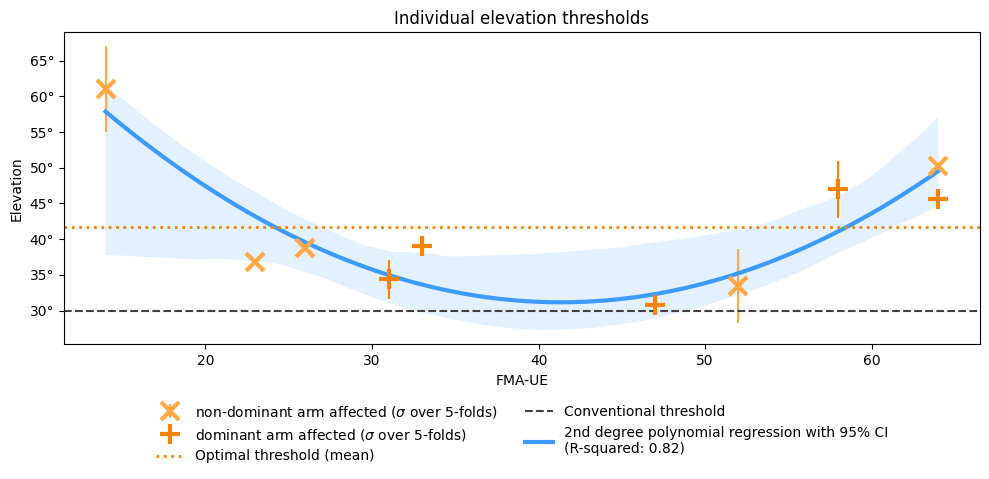

In [7]:
# conventional threshold Line doesn't make much sense here since the conventional thresholds are intended for the Subash functional space definition of GMAC
check_regression(FMA_UE, COUNT_THRESHOLD_LINUS, STD_COUNT_NDH_LINUS, x_label='FMA-UE', y_label='Counts per second', title='Individual count thresholds', dominant_impared=DOMINANT_IMPAIRED, model_to_fit='linear')
check_regression(FMA_UE, PITCH_THRESHOLD_LINUS, STD_PITCH_NDH_LINUS, x_label='FMA-UE', y_label='Elevation', title='Individual elevation thresholds', dominant_impared=DOMINANT_IMPAIRED, model_to_fit='polynomial')

## Healthy Arm

In [8]:
optimal_thresholds = result['optimal_GMAC_DH']
COUNT_THRESHOLD_HEALTHY = optimal_thresholds[:,0]
PITCH_THRESHOLD_HEALTHY = optimal_thresholds[:,1]
optimal_thresholds_Linus = result['optimal_GMAC_DH_Linus']
COUNT_THRESHOLD_LINUS_HEALTHY = optimal_thresholds_Linus[:,0]
PITCH_THRESHOLD_LINUS_HEALTHY = optimal_thresholds_Linus[:,1]

min_max_std_optimal_thresholds_GMAC_DH = result['min_max_std_GMAC_DH']
STD_COUNT_DH, STD_PITCH_DH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_DH)
min_max_std_optimal_thresholds_GMAC_DH_Linus = result['min_max_std_GMAC_DH_Linus']
STD_COUNT_DH_LINUS, STD_PITCH_DH_LINUS = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_DH_Linus)

In [9]:
print("Mean optimal count thresholds DH: ", np.mean(COUNT_THRESHOLD_HEALTHY))
print("Mean optimal elevation thresholds DH: ", np.mean(PITCH_THRESHOLD_HEALTHY))
print("Mean standard deviation of optimal counts thresholds DH: ", np.mean(STD_COUNT_DH))
print("Mean standard deviation of optimal elevation thresholds DH: ", np.mean(STD_PITCH_DH))

Mean optimal count thresholds DH:  5.499999999999999
Mean optimal elevation thresholds DH:  55.86
Mean standard deviation of optimal counts thresholds DH:  0.5953396806469469
Mean standard deviation of optimal elevation thresholds DH:  1.606815458669283


Linear model coefficients: [-0.13124661]
Linear model intercept: 10.90736013036393
Pearson Correlation: -0.4458796093391199 p-value: 0.19651293505954265
Spearman Correlation: -0.5477156428203347 p-value: 0.10122670405254074


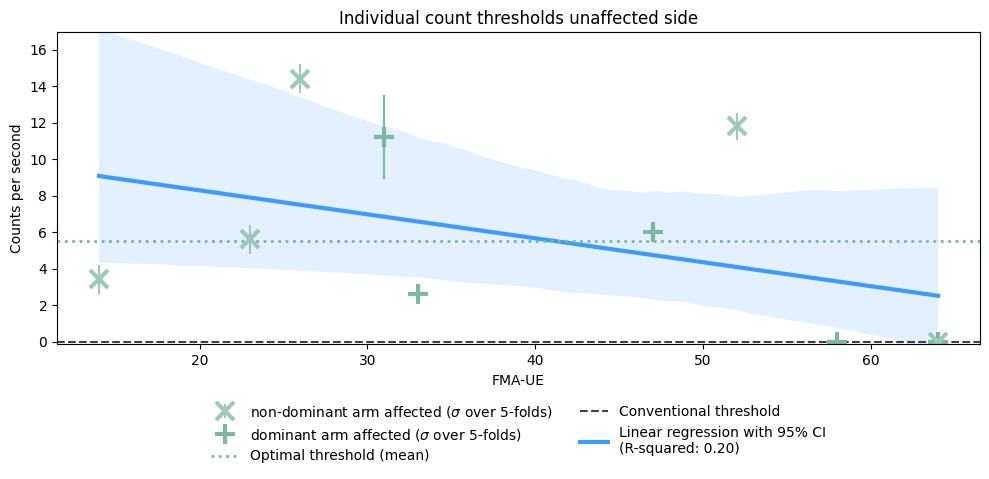

Linear model coefficients: [-0.10840576]
Linear model intercept: 60.326317218902766
Pearson Correlation: -0.2817436643389887 p-value: 0.430322409883748
Spearman Correlation: -0.10942299786241164 p-value: 0.7634826463741492


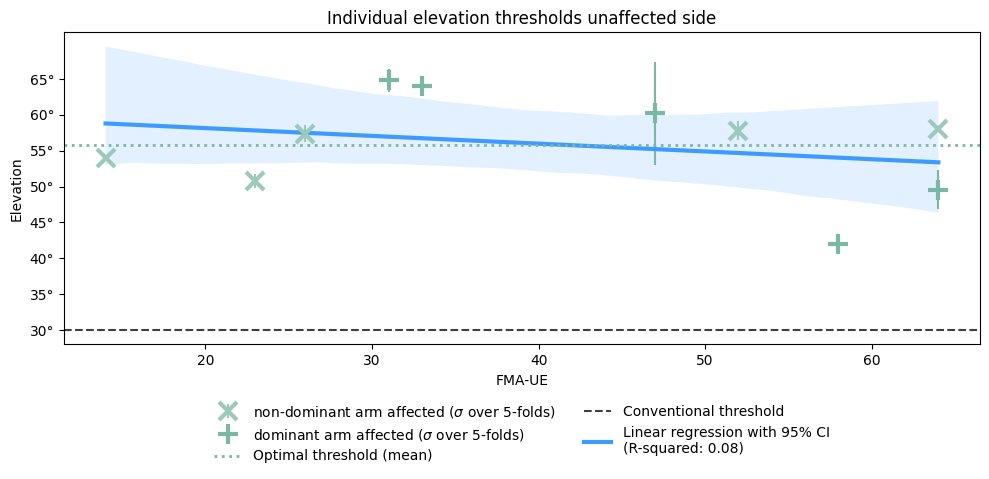

In [10]:
check_regression(FMA_UE, COUNT_THRESHOLD_HEALTHY, STD_COUNT_DH, x_label='FMA-UE', y_label='Counts per second', title='Individual count thresholds unaffected side', dominant_impared=DOMINANT_IMPAIRED, model_to_fit='linear')
check_regression(FMA_UE, PITCH_THRESHOLD_HEALTHY, STD_PITCH_DH, x_label='FMA-UE', y_label='Elevation', title='Individual elevation thresholds unaffected side', dominant_impared=DOMINANT_IMPAIRED, model_to_fit='linear')

## Check distribution of individual optimal thresholds

In [11]:
import numpy as np
def extract_dominant_hand_thresholds(count_threshold: np.ndarray, count_threshold_healthy: np.ndarray, pitch_threshold: np.ndarray, pitch_threshold_healthy: np.ndarray, dominant_impaired: np.ndarray):
    count_threshold_dominant_hand = np.where(dominant_impaired, count_threshold, count_threshold_healthy)
    pitch_threshold_dominant_hand = np.where(dominant_impaired, pitch_threshold, pitch_threshold_healthy)
    count_threshold_nondominant_hand = np.where(dominant_impaired, count_threshold_healthy, count_threshold)
    pitch_threshold_nondominant_hand = np.where(dominant_impaired, pitch_threshold_healthy, pitch_threshold)
    
    return count_threshold_dominant_hand, pitch_threshold_dominant_hand, count_threshold_nondominant_hand, pitch_threshold_nondominant_hand

In [12]:
COUNT_THRESHOLD_DOMINANT_HAND, ELEVATION_THRESHOLD_DOMINANT_HAND, COUNT_THRESHOLD_NONDOMINANT_HAND, ELEVATION_THRESHOLD_NONDOMINANT_HAND = extract_dominant_hand_thresholds(COUNT_THRESHOLD, COUNT_THRESHOLD_HEALTHY, PITCH_THRESHOLD, PITCH_THRESHOLD_HEALTHY, DOMINANT_IMPAIRED)

### Subash GMAC

Mean count threshold Affected side: 1.9000000000000004, Mean count threshold Unaffected side: 5.499999999999999
Wilcoxon Signed-Rank Test Count:
p-value: 0.12348527214454898
Paired Samples T-Test Count:
p-value: 0.06881395304465567
Mean elevation threshold Affected side: 42.62, Mean elevation threshold Unaffected side: 55.86
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.02734375
Paired Samples T-Test Elevation:
p-value: 0.016547390229919037


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


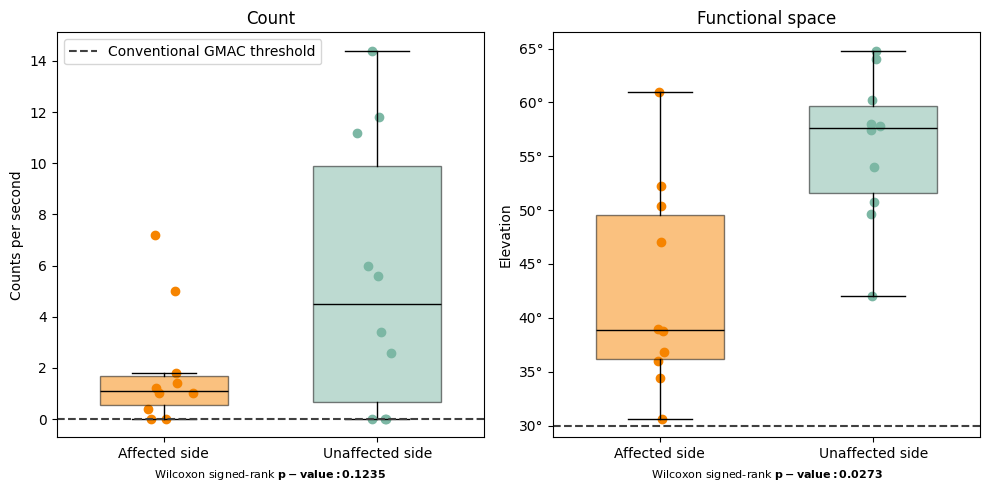

In [13]:
check_distribution(COUNT_THRESHOLD, COUNT_THRESHOLD_HEALTHY, PITCH_THRESHOLD, PITCH_THRESHOLD_HEALTHY) #healthy vs impaired


Mean count threshold Non-dominant side: 2.86, Mean count threshold Dominant side: 4.540000000000001
Wilcoxon Signed-Rank Test Count:
p-value: 0.4838398513935682
Paired Samples T-Test Count:
p-value: 0.4315540580485857
Mean elevation threshold Non-dominant side: 50.36, Mean elevation threshold Dominant side: 48.12
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.845703125
Paired Samples T-Test Elevation:
p-value: 0.7288666540390274


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


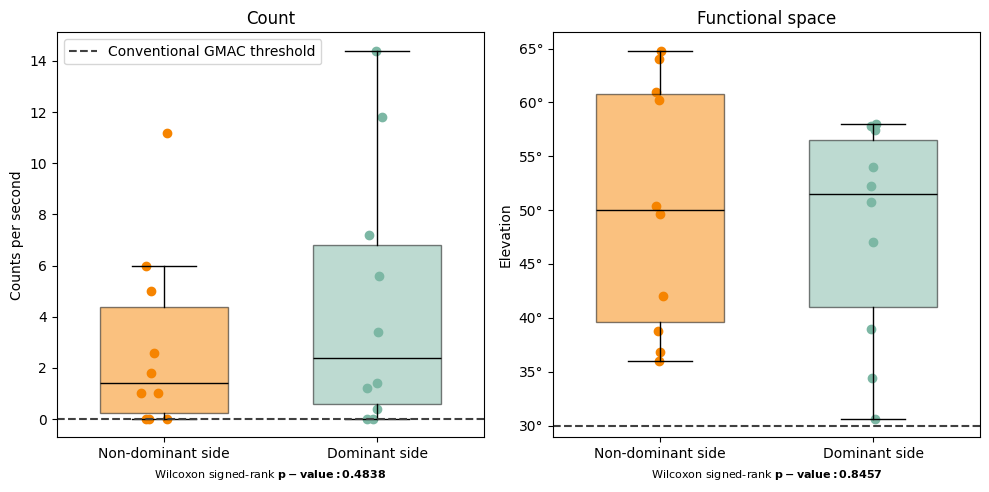

In [14]:
check_distribution(COUNT_THRESHOLD_NONDOMINANT_HAND, COUNT_THRESHOLD_DOMINANT_HAND, ELEVATION_THRESHOLD_NONDOMINANT_HAND, ELEVATION_THRESHOLD_DOMINANT_HAND, x_data_label=['Non-dominant side', 'Dominant side']) #dominant vs nondominant hand

### Linus GMAC

Mean count threshold Affected side: 1.92, Mean count threshold Unaffected side: 5.24
Wilcoxon Signed-Rank Test Count:
p-value: 0.16142946236708333
Paired Samples T-Test Count:
p-value: 0.07946619398264253
Mean elevation threshold Affected side: 41.699999999999996, Mean elevation threshold Unaffected side: 52.56
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.01953125
Paired Samples T-Test Elevation:
p-value: 0.013356888999904228


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


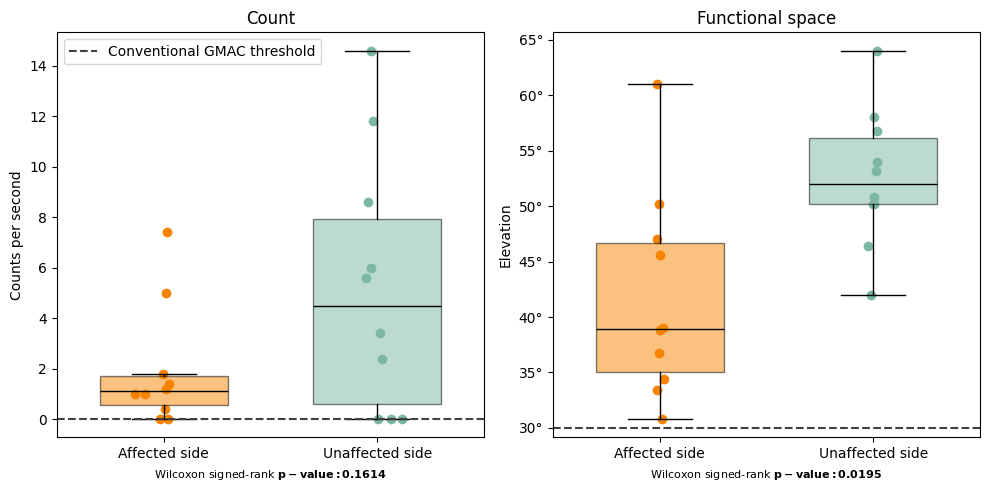

In [15]:
# conventional threshold Line doesn't make much sense here since the conventional thresholds are intended for the Subash functional space definition of GMAC
check_distribution(COUNT_THRESHOLD_LINUS, COUNT_THRESHOLD_LINUS_HEALTHY, PITCH_THRESHOLD_LINUS, PITCH_THRESHOLD_LINUS_HEALTHY)